# Jurnal Modul 3

code berikut merupakan library yang dipakai pada jurnal modul 1 ini.
1.import numpy berfungsi sebagai menampilkan nilai matriks yang berbentuk array
2.import matplotlib/plt berfungsi sebagai menampilkan sebbuah histogram yang ada dibawah
3.import cv2 berfungsi untuk menampilkan gambar pada python
4.import matplotlib.image as mpimg berfungsi untuk menampilkan gambar yang di import ke dalam python

In [422]:
import matplotlib.pyplot as plt
import matplotlib.image as img 
import cv2 as cv
import numpy as np

## 1. Melakukan Dekomposisi Citra

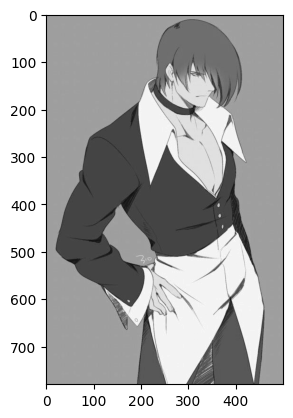

In [423]:
gray_img = cv.imread("IoriYagami.jpg", cv.IMREAD_GRAYSCALE)
plt.imshow(gray_img, cmap="gray")

fungsi tersebut bertujuan untuk mengubah sebuah gambar berwarna menjadi gambar skala abu-abu dengan cara mengonversinya menjadi citra keabuan dengan menggunakan mode cv.IMREAD_GRAYSCALE.

In [424]:
low_pass = np.array([0.7, 0.7])
high_pass = np.array([-0.7, 0.7])

melakukan inisialisasi pada kernel atau filter

Fungsi row_padding berfungsi untuk menambahkan padding 0 sebanyak n pada bagian baris dari citra aslinya, dengan cara setiap n didapatkan dari panjang kernel dikurangi 1, kemudian dilakukan penambahan padding dengan fungsi pad pada numpy lalu menyimpan dan mengembalikan kembali citra hasil padding pada variabel result

In [425]:
def row_padding(img, n):
    n = len(n) - 1
    result = np.pad(img, [(0, 0), (0, n)])
    return result

fungsi column_padding berfungsi untuk menambahkan padding 0 sebanyak n pada bagian kolom dari citra aslinya, dengan cara setiap n didapatkan dari panjang kernel dikurangi 1, kemudian dilakukan penambahan padding dengan fungsi pad pada numpy lalu menyimpan dan mengembalikan kembali citra hasil padding pada variabel result

In [426]:
def column_padding(img, n):
    n = len(n) - 1
    result = np.pad(img, [(0, n), (0, 0)])
    return result

fungsi row_convolution berfungsi untuk melakukan konvolusi pada citra hasil padding dengan kernel atau filter , 2 perulangan awal digunakan untuk mengakses tiap indeks atau pixel yang berada pada citra hasil padding, kemudian perulangan yang berada di dalamnya digunakan sebagai konvolusi yang nantinya hasil konvolusi tiap indeksnya akan tersimpan dan dikembalikan pada variabel result

In [427]:
def row_convolution(pad, kernel, img):
    result = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(len(kernel)):
                result[i][j] += (kernel[k] * pad[i, j + k])
    return result

fungsi column_convolution berfungsi untuk melakukan konvolusi pada citra hasil padding dengan kernel atau filter, 2 perulangan awal digunakan untuk mengakses tiap indeks atau pixel yang berada pada citra hasil padding, kemudian perulangan yang berada di dalamnya digunakan sebagai konvolusi yang nantinya hasil konvolusi tiap indeksnya akan tersimpan dan dikembalikan pada variabel result


In [428]:
def column_convolution(pad, kernel, img):
    result = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(len(kernel)):
                result[i][j] += (kernel[k] * pad[i + k, j])
    return result

fungsi row_DownSampling berfungsi untuk mengambil sebagian hasil dari row_convolution, indeks yang diambil akan berselang 1 baris dari citra aslinya, kemudian menyimpan dan mengembalikannya pada variabel result

In [429]:
def row_DownSampling(array):
    baris = int(array.shape[0] / 2)
    kolom = int(array.shape[1])
    result = np.zeros((baris, kolom))
    index = 0
    for i in range(baris):
        for j in range(kolom):
            result[i][j] = array[index][j]
        index += 2
    return result

fungsi column_DownSampling berfungsi untuk mengambil sebagian hasil dari column_convolution, indeks yang diambil akan berselang 1 kolom dari citra aslinya, kemudian menyimpan dan mengembalikannya pada variabel result

In [430]:
def column_DownSampling(array):
    baris = int(array.shape[0])
    kolom = int(array.shape[1] / 2)
    result = np.zeros((baris, kolom))
    for i in range(baris):
        index = 0
        for j in range(kolom):
            result[i][j] = array[i][index]
            index += 2
    return result

fungsi dekomposisi berfungsi untuk melakukan dekomposisi wavelet dengan parameternya suatu citra dan 2 buah filter, yang dimana proses di dalamnya terdapat konvolusi dan down sampling yang dilakukan masing masing 2 kali berdasarkan filternya, kemudian hasil akan dikembalikan dengan variabel result


In [431]:
def dekomposisi(citra, f1, f2):
    Pad1 = row_padding(citra, f1)
    Konvolusi1 = row_convolution(Pad1, f1, citra)
    DownSampling1 = column_DownSampling(Konvolusi1)

    Pad2 = column_padding(DownSampling1, f2)
    Konvolusi2 = column_convolution(Pad2, f2, DownSampling1)
    DownSampling2 = row_DownSampling(Konvolusi2)
    
    Result = DownSampling2
    return Result

In [432]:
def normalize_image(img):
    min_val = np.min(img)
    max_val = np.max(img)
    normalized_img = ((img - min_val) / (max_val - min_val)) * 255
    return normalized_img.astype(np.uint8)

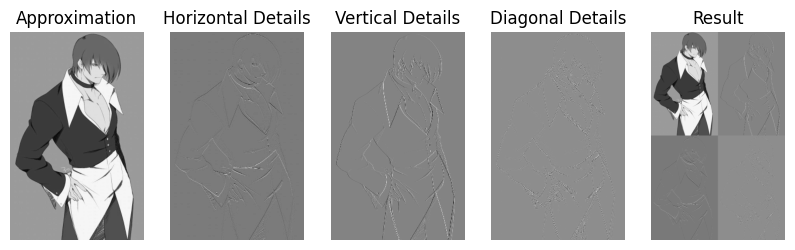

In [433]:
# input jumlah level dekomposisi
num_levels = 1

# jumlah filter level
LL_levels = []
LH_levels = []
HL_levels = []
HH_levels = []
combined_levels = []

current_image = gray_img
for level in range(1, num_levels + 1):

    
    # dekomposisi level - level
    LL = dekomposisi(current_image, low_pass, low_pass)
    LH = dekomposisi(current_image, low_pass, high_pass)
    HL = dekomposisi(current_image, high_pass, low_pass)
    HH = dekomposisi(current_image, high_pass, high_pass)
    
    # Menormalkan setiap komponen dan simpan dalam daftar masing-masing
    LL_levels.append(normalize_image(LL))
    LH_levels.append(normalize_image(LH))
    HL_levels.append(normalize_image(HL))
    HH_levels.append(normalize_image(HH))
        
    # perbarui gambar saat ini untuk dekomposisi tingkat berikutnya
    current_image = LL  # gunakan LL sebagai input untuk tingkat berikutnya

def rentangPix(image, newMin=0, newMax=255):
    min = image.min()
    max = image.max()
    range = max - min
    newRange = newMax - newMin
    sesuaiImg = (((image - min) * newRange) / range) + newMin
    return sesuaiImg.astype('uint8')

hasil = display(rentangPix(LL), rentangPix(LH), rentangPix(HL), rentangPix(HH))

fig = plt.figure(figsize=(10, 10))
row = 1
colom = 5
titles = ["Approximation", "Horizontal Details", "Vertical Details", "Diagonal Details", "Result"]
images = [LL, LH, HL, HH, hasil]

for i in range(5):
    fig.add_subplot(row, colom, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    plt.title(titles[i])

plt.show()

## menampilkan hasil dekomposisi citra pada level 3, 4, 5 dan seterusnya secara dinamis

In [434]:
def dilatasi(skala, img):
    height, width = img.shape
    Dilatasi = np.zeros((height*skala, width*skala))
    n = 0
    for i in range(height*skala):
        m = 0
        for j in range(width*skala):
            Dilatasi[i][j] = img[n][m]
            if j % skala == skala-1:
                m += 1
        if i % skala == skala-1:
            n += 1
    return Dilatasi

Fungsi dilatasi untuk mengulangi setiap piksel dalam citra sesuai dengan faktor skala yang diberikan. 

(-0.5, 1999.5, 3119.5, -0.5)

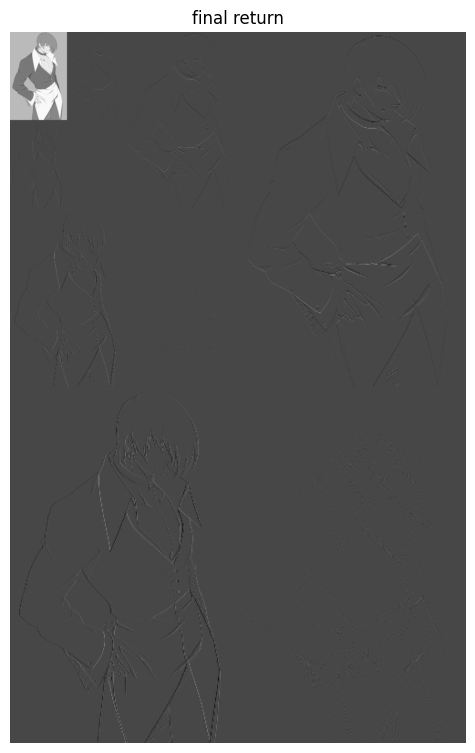

In [435]:
def merge(newll, newlh, newhl, newhh):
    (height, width) = newll.shape[:2]
    result = np.zeros((height*2, width*2))
    for i in range(height):
        for j in range(width):
            result[i,j] = newll[i,j]
            result[i+height, j] = newhl[i, j]
            result[i, j+width] = newlh[i, j]
            result[i+height, j+width] = newhh[i, j]
    
    return result

def merge_combined(lL, lH, hL, hH, levels):
    result = merge(lL, lH, hL, hH)
    for i in range(levels-1):
        lH = dilatasi(2, lH)
        hL = dilatasi(2, hL)
        hH = dilatasi(2, hH)
               
        if i >= 1:
            result = merge(result, lH, hL, hH)
        else:
            result = merge(result, lH, hL, hH)

    return result

final  = merge_combined(LL, LH, HL, HH, 3)
plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
plt.title('final return')
plt.imshow(final, cmap='gray')
plt.axis('off')

Fungsi merge bertujuan untuk menggabungkan empat sub-blok citra menjadi satu citra yang lebih besar dan Fungsi merge_combined memperluas proses penggabungan ke beberapa level dengan cara melakukan dilatasi   citra hasil akhir ditampilkan menggunakan plt.imshow dengan skala abu-abu.

## 2. Melakukan rekonstruksi dari hasil dekomposisi

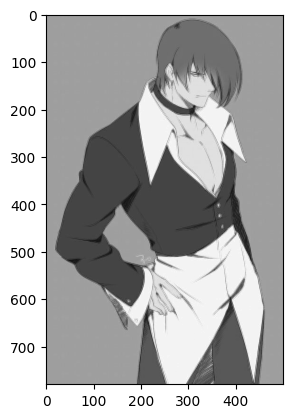

In [436]:
def rekonstruksi(LL, LH, HL, HH):
    tinggi_img, lebar_img = LL.shape 
    t = tinggi_img*2; l = lebar_img*2 
    image = np.zeros([t,l]) 
    LL2, LH2 = np.zeros([t,l]), np.zeros([t,l]) 
    HL2, HH2 = np.zeros([t,l]), np.zeros([t,l]) 
    for i in range(0,t,2):
        for j in range(0,l,2):
            LL2[i][j] = LL[int(i/2)][int(j/2)]
            LH2[i][j] = LH[int(i/2)][int(j/2)]
            HL2[i][j] = HL[int(i/2)][int(j/2)]
            HH2[i][j] = HH[int(i/2)][int(j/2)]
    
    for i in range(1,t,2):
        for j in range(l):
            LL2[i][j]  = LL2[i-1][j]
            LH2[i][j] -= LH2[i-1][j]
            HL2[i][j]  = HL2[i-1][j]
            HH2[i][j] -= HH2[i-1][j]
    for i in range(t):
        for j in range(1,l,2):
            LL2[i][j]  = LL2[i][j-1]
            LH2[i][j]  = LH2[i][j-1]
            HL2[i][j] -= HL2[i][j-1]
            HH2[i][j] -= HH2[i][j-1]
    
    for i in range(t):
        for j in range(l):
            image[i][j] += (LL2[i][j]+LH2[i][j]+HL2[i][j]+HH2[i][j])
    return image 

hasilrekon = rekonstruksi (LL, LH, HL, HH)
plt.imshow(hasilrekon, cmap='gray')

Fungsi di atas merupakan fungsi rekonstruksi citra dengan nilai keluaran berupa citra gambar utuh.
Fungsi ini menerima input berupa citra LL, LH, HL, dan HH. keempat citra tersebut harus berukuran sama agar dapat bekerja sebagaimana mestinya.
Pada syntax "h = height dan l = length" Menggandakan ukuran citra pada dimensi tinggi dan lebar dengan mengalikan height dan length dengan 2, dan menyimpan hasilnya ke dalam variabel h dan l. Hal ini dilakukan untuk mempersiapkan ukuran matriks rekonstruksi yang akan diperoleh.
Pada syntax "image = np.zeros([h, l])" Membuat sebuah matriks nol berukuran height dan length sebagai matriks rekonstruksi, yang akan diisi dengan koefisien hasil transformasi wavelet.

## Pada level berapa hasil dari dekomposisi berikut? berikan alasannya

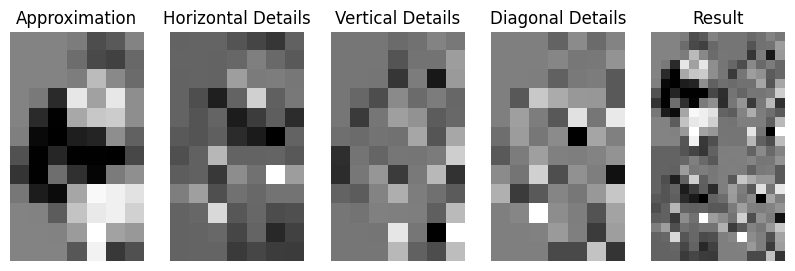

In [437]:
# input jumlah level dekomposisi
num_levels = 6

# jumlah filter level
LL_levels = []
LH_levels = []
HL_levels = []
HH_levels = []
combined_levels = []

current_image = gray_img
for level in range(1, num_levels + 1):

    
    # dekomposisi level - level
    LL = dekomposisi(current_image, low_pass, low_pass)
    LH = dekomposisi(current_image, low_pass, high_pass)
    HL = dekomposisi(current_image, high_pass, low_pass)
    HH = dekomposisi(current_image, high_pass, high_pass)
    
    # Menormalkan setiap komponen dan simpan dalam daftar masing-masing
    LL_levels.append(normalize_image(LL))
    LH_levels.append(normalize_image(LH))
    HL_levels.append(normalize_image(HL))
    HH_levels.append(normalize_image(HH))
        
    # perbarui gambar saat ini untuk dekomposisi tingkat berikutnya
    current_image = LL  # gunakan LL sebagai input untuk tingkat berikutnya

def rentangPix(image, newMin=0, newMax=255):
    min = image.min()
    max = image.max()
    range = max - min
    newRange = newMax - newMin
    sesuaiImg = (((image - min) * newRange) / range) + newMin
    return sesuaiImg.astype('uint8')

hasil = display(rentangPix(LL), rentangPix(LH), rentangPix(HL), rentangPix(HH))

fig = plt.figure(figsize=(10, 10))
row = 1
colom = 5
titles = ["Approximation", "Horizontal Details", "Vertical Details", "Diagonal Details", "Result"]
images = [LL, LH, HL, HH, hasil]

for i in range(5):
    fig.add_subplot(row, colom, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    plt.title(titles[i])

plt.show()

pada level 6, karena dari hasil dekomposisi sesuai level tadi, didapatkan hasil pada level 6 dari gambar dan code yang ada sebelumnya.

## 4. Menampilkan representasi sinyal pada hasil dekomposisi pada nomor 3

In [438]:
def get_amplitude_index(img):
    amplitude = (img - np.min(img)) * (255 / (np.max(img) - np.min(img)))
    index = np.arange(img.size).reshape(img.shape)

    return amplitude, index

num_levels = 6 

Fungsi get_amplitude_index digunakan untuk menghasilkan nilai amplitudo dan indeks dari setiap piksel dalam citra yang diberikan. Pertama dilakukan normalissasi dengan mengubah rentang nilai piksel dari nilai minimum hingga maksimum menjadi rentang 0 hingga 255. fungsi np.arange untuk membuat array indeks dengan ukuran yang sama dengan citra untuk menghasilkan indeks dari setiap piksel dalam citra. Variabel num_levels untuk menentukan jumlah level dekomposisi yang mau dilakukan pada citra. 

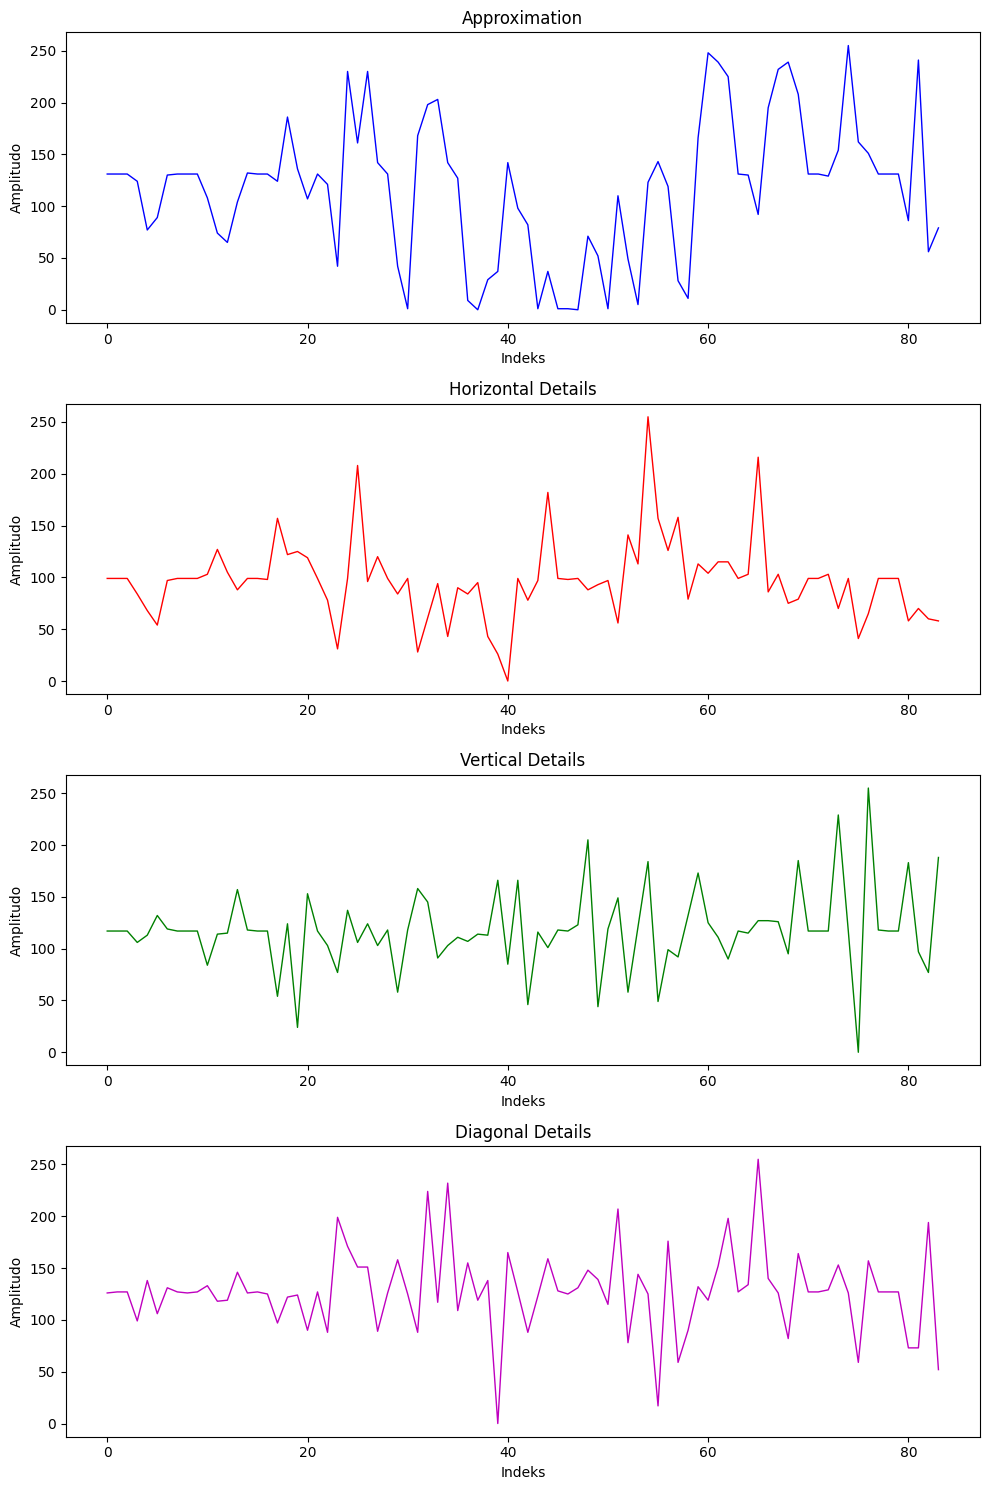

In [439]:
current_image = gray_img
for level in range(1, num_levels + 1):
    
    LL = dekomposisi(current_image, low_pass, low_pass)
    LH = dekomposisi(current_image, low_pass, high_pass)
    HL = dekomposisi(current_image, high_pass, low_pass)
    HH = dekomposisi(current_image, high_pass, high_pass)
    
    LL_norm = normalize_image(LL)
    LH_norm = normalize_image(LH)
    HL_norm = normalize_image(HL)
    HH_norm = normalize_image(HH)
    
    if level == 6:
        LL_amp, LL_idx = get_amplitude_index(LL_norm)
        LH_amp, LH_idx = get_amplitude_index(LH_norm)
        HL_amp, HL_idx = get_amplitude_index(HL_norm)
        HH_amp, HH_idx = get_amplitude_index(HH_norm)
        
        fig, axes = plt.subplots(4, 1, figsize=(10, 15))
        
        axes[0].plot(LL_idx.flatten(), LL_amp.flatten(), 'b-', linewidth=1)
        axes[0].set_title("Approximation")
        axes[0].set_xlabel("Indeks")
        axes[0].set_ylabel("Amplitudo")
        
        axes[1].plot(LH_idx.flatten(), LH_amp.flatten(), 'r-', linewidth=1)
        axes[1].set_title("Horizontal Details")
        axes[1].set_xlabel("Indeks")
        axes[1].set_ylabel("Amplitudo")
        
        axes[2].plot(HL_idx.flatten(), HL_amp.flatten(), 'g-', linewidth=1)
        axes[2].set_title("Vertical Details")
        axes[2].set_xlabel("Indeks")
        axes[2].set_ylabel("Amplitudo")
        
        axes[3].plot(HH_idx.flatten(), HH_amp.flatten(), 'm-', linewidth=1)
        axes[3].set_title("Diagonal Details")
        axes[3].set_xlabel("Indeks")
        axes[3].set_ylabel("Amplitudo")
        
        plt.tight_layout()
        plt.show()
    
    current_image = LL 

kode tersebut adalah proses dekomposisi citra dengan wavelet transform menggunakan jumlah level dekomposisi yang udah ditentukan sebelumnya. yang awalnya diatur sebagi citra abu-abu asli. terus dalam loop for, setiap level dekomposisi diperoleh dengan memanggil fungsi dekomposisi untuk menghasilkan komponen-komponen LL, LH, HL dan HH. didapatkan hasil dekomposisi pada level ke-6 dan akan dihitung menggunakan fungsi get_amplitude_index. kemudian itampilkan dalam empat subplot berbeda dimana setiao subplot menunjukkan grafik amplituda terhadap indeks untuk salah satu dari komponen LL, LH, HL, dan HH. Proses ini akan diulang untuk setiap level dekomposisi, tapi hanya hasil pada level ke-6 yang ditampilkan.